#Convolutional Neural Network for Vegetable Image Classification

##1. Downloading the dataset

In [ ]:
!pip install opendatasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import opendatasets as od

In [ ]:
download_url = 'https://www.kaggle.com/datasets/misrakahmed/vegetable-image-dataset'

Upload the Kaggle API key json file or input the username & API key from Kaggle

In [ ]:
od.download(download_url)

100%|██████████| 534M/534M [00:23<00:00, 24.0MB/s]


##2. Importing all the libraries & packages

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
import numpy as np
import matplotlib.pyplot as plt
from glob import glob

##3. Preparing the dataset

In [ ]:
data_dir = "vegetable-image-dataset/Vegetable Images/"

In [ ]:
import os

In [ ]:
classes = os.listdir(data_dir+'train')
classes, type(classes)

(['Papaya',
  'Cauliflower',
  'Capsicum',
  'Carrot',
  'Tomato',
  'Cucumber',
  'Potato',
  'Pumpkin',
  'Cabbage',
  'Brinjal',
  'Broccoli',
  'Radish',
  'Bottle_Gourd',
  'Bean',
  'Bitter_Gourd'],
 list)

In [ ]:
IMG_SIZE = [224,224]

train_path = data_dir+'train'
test_path = data_dir+'test'
valid_path = data_dir+'valid'

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
validation_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224,224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 15000 images belonging to 15 classes.


In [ ]:
validation_set = validation_datagen.flow_from_directory(test_path,
                                                 target_size = (224,224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 3000 images belonging to 15 classes.


In [ ]:
test_set = test_datagen.flow_from_directory(test_path,
                                                 target_size = (224,224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 3000 images belonging to 15 classes.


##4. Visualizing the dataset


In [ ]:
training_set.class_indices

{'Bean': 0,
 'Bitter_Gourd': 1,
 'Bottle_Gourd': 2,
 'Brinjal': 3,
 'Broccoli': 4,
 'Cabbage': 5,
 'Capsicum': 6,
 'Carrot': 7,
 'Cauliflower': 8,
 'Cucumber': 9,
 'Papaya': 10,
 'Potato': 11,
 'Pumpkin': 12,
 'Radish': 13,
 'Tomato': 14}

In [ ]:
img = tf.keras.preprocessing.image.load_img(
    training_set.filepaths[-1], grayscale=False, color_mode="rgb", target_size=None, interpolation="nearest"
)

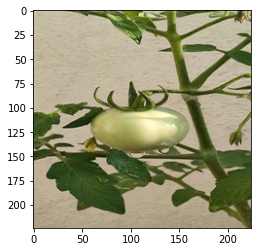

In [ ]:
plt.imshow(img)

##5. Building the Model

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(layers.BatchNormalization(axis=3))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(15,activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 222, 222, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                        

In [ ]:
folders = glob(data_dir+'train/*')

In [ ]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

##6. Training & Evaluating the model

In [ ]:
%%time
r = model.fit_generator(
    training_set,
    validation_data=validation_set,
    epochs=20,
    steps_per_epoch=len(training_set),
    validation_steps=len(validation_set)
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/20
469/469 [==============================] - 184s 365ms/step - loss: 1.9087 - accuracy: 0.3911 - val_loss: 1.1945 - val_accuracy: 0.6170
Epoch 2/20
469/469 [==============================] - 170s 363ms/step - loss: 0.9141 - accuracy: 0.7022 - val_loss: 2.0192 - val_accuracy: 0.5230
Epoch 3/20
469/469 [==============================] - 170s 363ms/step - loss: 0.6184 - accuracy: 0.8018 - val_loss: 0.7932 - val_accuracy: 0.7510
Epoch 4/20
469/469 [==============================] - 171s 364ms/step - loss: 0.4495 - accuracy: 0.8579 - val_loss: 0.9924 - val_accuracy: 0.7147
Epoch 5/20
469/469 [==============================] - 170s 362ms/step - loss: 0.3422 - accuracy: 0.8931 - val_loss: 0.4674 - val_accuracy: 0.8497
Epoch 6/20
469/469 [==============================] - 171s 364ms/step - loss: 0.2674 - accuracy: 0.9159 - val_loss: 0.3639 - val_accuracy: 0.9033
Epoch 7/20
469/469 [==============================] - 170s 363ms/step - loss: 0.2345 - accuracy: 0.9291 - val_loss: 1.4202 -

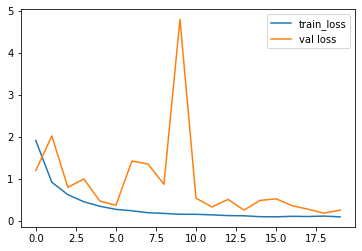

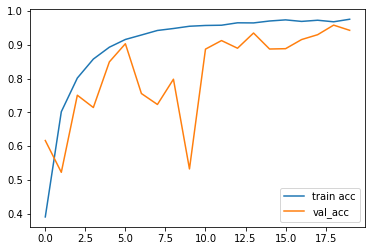

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.plot(r.history['loss'], label='train_loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()
plt.savefig('AccsVal_acc')

In [ ]:
model.save('basic_cnn_weights.h5')

In [ ]:
results = model.evaluate(test_set, batch_size=32)

94/94 [==============================] - 6s 67ms/step - loss: 0.2501 - accuracy: 0.9430
